# Aircraft Patent Application Analysis

## by Justin Sierchio

In this analysis, we will be looking at patent applications related to aircraft. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What specific technologies are being patented?</li>
    <li>How long is it taking to obtain these patents?</li>
    <li>Where are the patent applications being filed?>/li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/mystery/patents/download. More information related to the dataset can be found at: https://www.kaggle.com/mystery/patents.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_PATENTS = pd.read_csv("df_merged.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Patent Dataset
df_PATENTS.head()

,Unnamed: 0,Application Id,Application Number,Country,Title,Abstract,I P C,Application Date,year,cluster_tf_idf
0,0,WO2015116015,PCT/UA2014/000017,WO,INFLATABLE AIRCRAFT,inflatable vertical takeoff landing aircraft i...,B64C 29/00; B64C 31/06; B64C 27/32,2014-03-02,2014,7
1,1,WO2015166113,PCT/ES2014/070372,WO,SEALING DEVICE FOR AIRCRAFT PROPELLER ENGINE,invention relates sealing device aircraft engi...,B64C 35/00; B64C 11/00; B64C 99/00,2014-04-29,2014,1
2,2,WO2014185492,PCT/JP2014/062955,WO,VERTICAL TAKE-OFF AND LANDING AIRCRAFT,vertical take landing aircraft comprises prope...,B64C 29/00; B64C 27/20; B64C 27/22,2014-05-15,2014,4
3,3,WO2015112039,PCT/RU2014/000035,WO,AIRCRAFT,﻿ claimed invention relates aviation particula...,B64C 39/12; B64C 11/00; B64C 9/00,2014-01-22,2014,9
4,4,WO2015099375,PCT/KR2014/012634,WO,MULTI-ROTOR FLYING OBJECT,present invention provides multi rotor flying ...,B64C 27/08; B64C 29/02; B64C 27/52,2014-12-22,2014,7


This dataset contains columns describing such features as the application ID, application number, country of origin, title, abstract, international patent classification (IPC), application date and year.

## Data Cleaning

Let's begin this project by looking at some of the general aspects of our data.

In [4]:
# Display basic info about our patent dataset
df_PATENTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118942 entries, 0 to 118941
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          118942 non-null  int64 
 1   Application Id      118942 non-null  object
 2   Application Number  118940 non-null  object
 3    Country            118942 non-null  object
 4   Title               118924 non-null  object
 5   Abstract            118919 non-null  object
 6   I P C               118942 non-null  object
 7   Application Date    118942 non-null  object
 8   year                118942 non-null  int64 
 9   cluster_tf_idf      118942 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.1+ MB


We see that we have two patents that do not have an application number. Other than that, the data appears to be sufficiently cleaned for analysis.

## Exploratory Data Analysis

Let's first determine what data range these patent applications were filed.

Text(0.5, 0, 'Year')

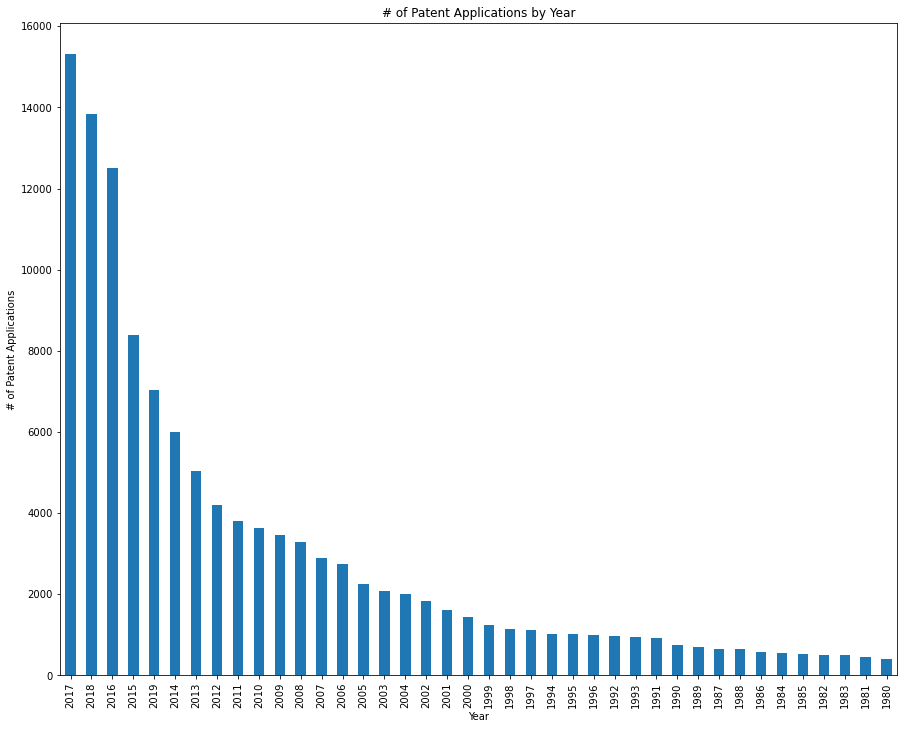

In [5]:
# Determine Timeframe for Patent Applications
plt.figure(figsize=(15,12))
df_PATENTS['year'].value_counts()[:40].plot(kind='bar')
plt.title('# of Patent Applications by Year')
plt.ylabel('# of Patent Applications')
plt.xlabel('Year')

So now we know the patent applications were filed from 1980 to 2017. Now let's determine where these patents are from using a bar chart.

Text(0.5, 0, 'Country Code')

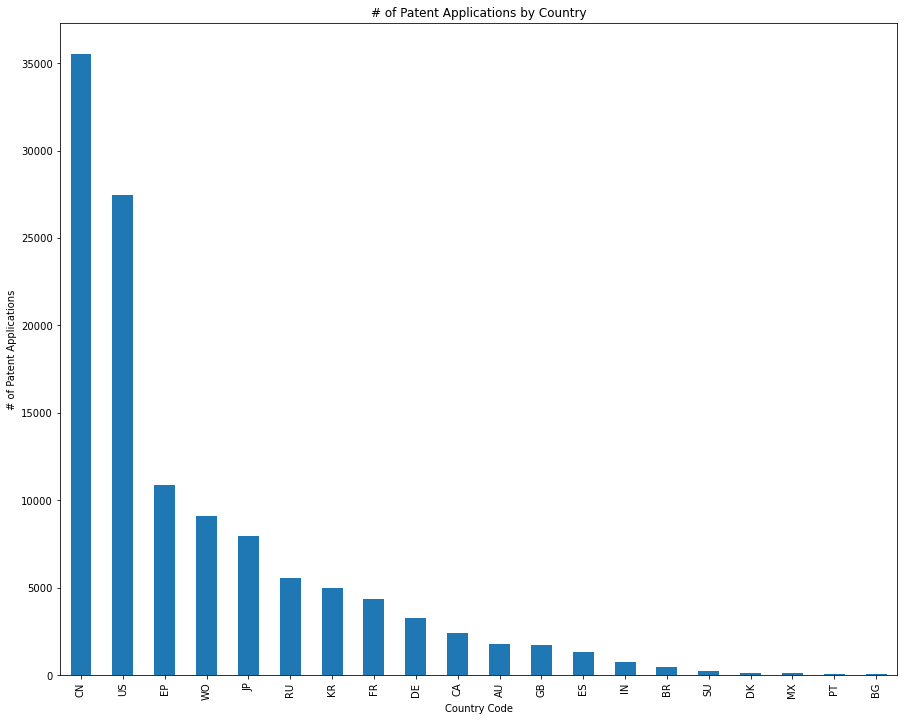

In [6]:
# Determine Country of Origin for Patents
plt.figure(figsize=(15,12))
df_PATENTS[' Country'].value_counts()[:20].plot(kind='bar')
plt.title('# of Patent Applications by Country')
plt.ylabel('# of Patent Applications')
plt.xlabel('Country Code')

As we can see, the leading countries for patent applications among aircraft-related technologies are China (CN), the United States (US), European Union (EP), Japan (JP), Russia (RU) and South Korea (KR). WO represents the World Intellectual Property Organization (WIPO) and is an international standard.